Dataset:
https://www.kaggle.com/datasets/brmil07/bank-stock-price/data

In [1]:
import pandas as pd

# Load the dataset from a CSV file
file_path = '/content/BTC-USD.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()
# first 5 records from dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
df.tail()
#last 5 record from dataset

,Date,Open,High,Low,Close,Adj Close,Volume
2783,2022-05-01,37713.26563,38627.85938,37585.78906,38469.09375,38469.09375,2.700276e+10
2784,2022-05-02,38472.18750,39074.97266,38156.56250,38529.32813,38529.32813,3.292264e+10
2785,2022-05-03,38528.10938,38629.99609,37585.62109,37750.45313,37750.45313,2.732694e+10
2786,2022-05-04,37748.01172,39902.94922,37732.05859,39698.37109,39698.37109,3.675440e+10
2787,2022-05-05,39727.38672,39788.44141,39444.64453,39568.81250,39568.81250,3.469308e+10


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


##EDA (exploratory data analysis)








In [5]:
df.shape
# how many row and columns in dataset

(2788, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Close      2788 non-null   float64
 5   Adj Close  2788 non-null   float64
 6   Volume     2788 non-null   float64
dtypes: float64(6), object(1)
memory usage: 152.6+ KB


In [7]:
df.isna().sum()
#Any null values present in dataset (no need to clean data, data are already clean)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.describe()
#information about dataset

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381436,16615.381436,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040043,11388.611572,10722.320560,11056.325198,11056.325198,2.558002e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


##Data Preprocessing

For finding insighs of data i am using volumn analysis, volatility analysis, moving average methods

In [9]:
import matplotlib.pyplot as plt


In [10]:
#Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

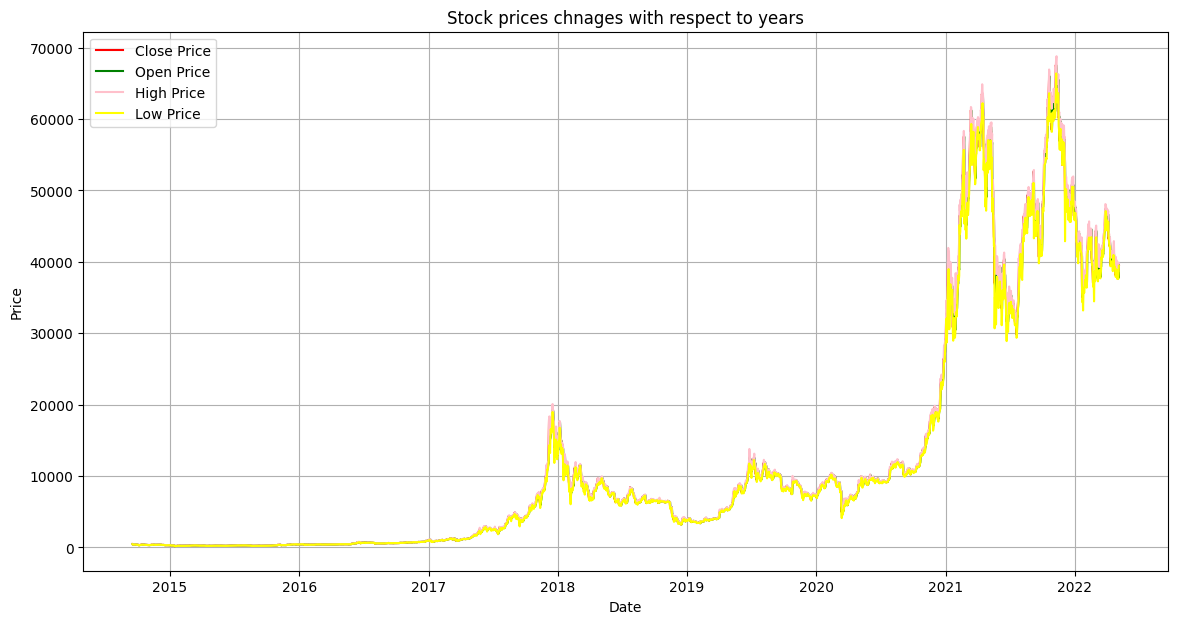

In [26]:
# Data Visualization
# set figure size to 14 by 7 inches
plt.figure(figsize=(14, 7))

# Line plot for stock prices
plt.plot(df['Date'], df['Close'], label='Close Price', color='red')
plt.plot(df['Date'], df['Open'], label='Open Price', color='green')
plt.plot(df['Date'], df['High'], label='High Price', color='pink')
plt.plot(df['Date'], df['Low'], label='Low Price', color='yellow')
plt.title('Stock prices chnages with respect to years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

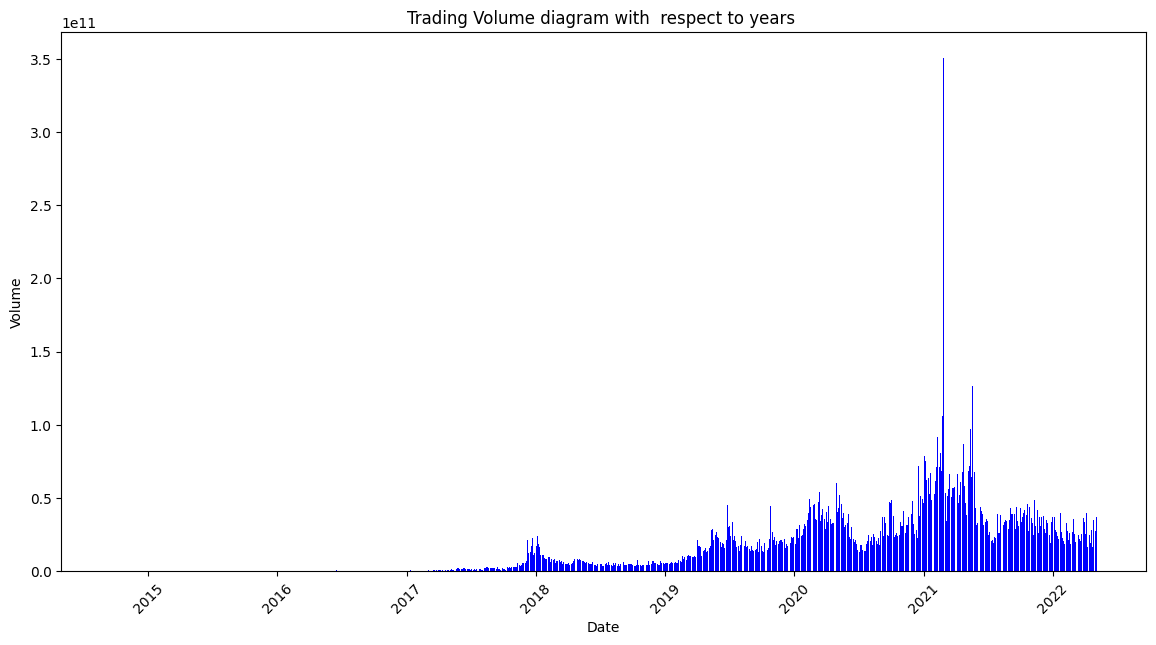

In [27]:
# Volume analysis
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], color='blue')
plt.title('Trading Volume diagram with  respect to years ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()


In [17]:
import numpy as np
import seaborn as sns

**Daily Return**
* Daily Return refer profit or loss of a stock on day to day basis.

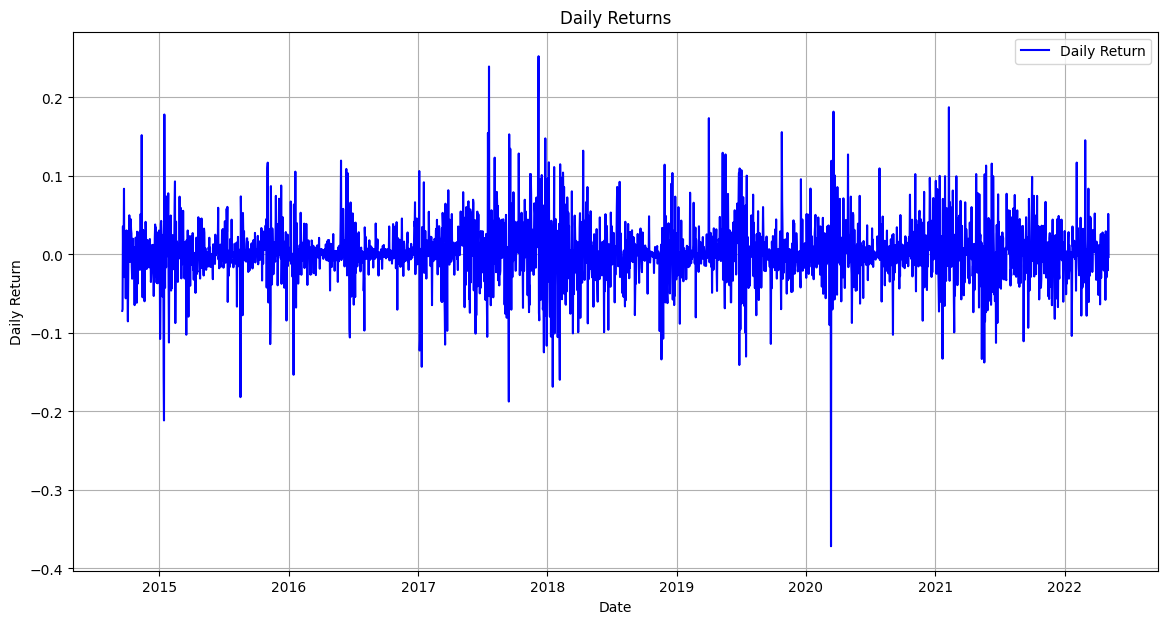

Daily Return Statistics:
count    2787.000000
mean        0.002357
std         0.038700
min        -0.371695
25%        -0.013384
50%         0.001988
75%         0.018230
max         0.252472
Name: Daily Return, dtype: float64


In [19]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

print("Daily Return Statistics:")
print(df['Daily Return'].describe())


Conclusion of above diagram:
* Average (mean) daily return is about 0.24%, or 0.002357 indicates that the stock grows somewhat every day. This is a positive sign for long-term investors because consistent little gains can add up over time.
* The standard deviation of daily returns is approximately 3.87%. This statistic represents the average daily return departure from the mean, which reflects the stock's volatility. significantly from the mean, implying potential for both large gains and losses.A higher standard deviation indicates greater fluctuation in daily returns.
* minimum (-37.17%) and maximum (25.25%) daily returns shows that the stock can experience extreme fluctuation


In [20]:
'''Analysis positive and negative return days:
 higher number of positive days might attract long-term investors,
 while frequent negative days might concern risk-averse investors.'''

positive_days = df[df['Daily Return'] > 0]['Daily Return'].count()
negative_days = df[df['Daily Return'] < 0]['Daily Return'].count()
total_days = df['Daily Return'].count()

print(f"Number of positive return as per days: {positive_days}")
print(f"Number of negative return as per days: {negative_days}")
print(f"Total trading days: {total_days}")


Number of positive return as per days: 1506
Number of negative return as per days: 1280
Total trading days: 2787


**Volatility Analysis**:


* Volatility analysis refers to the study and measurement of fluctuations in the price of a security over a specified period of time.

* This approach measures the actual volatility observed in past price movements over a specified lookback period, such as 20 days or 90 days.   
* Historical volatility is calculated by analyzing the historical closing prices of a stock over the selected timeframe.The Standard deviation measures how dispersed the price data points are from the statistical mean, or average price. A higher standard deviation indicates wider price swings and higher volatility.

* Historical volatility provides insights into how volatile the stock has been in the recent past.

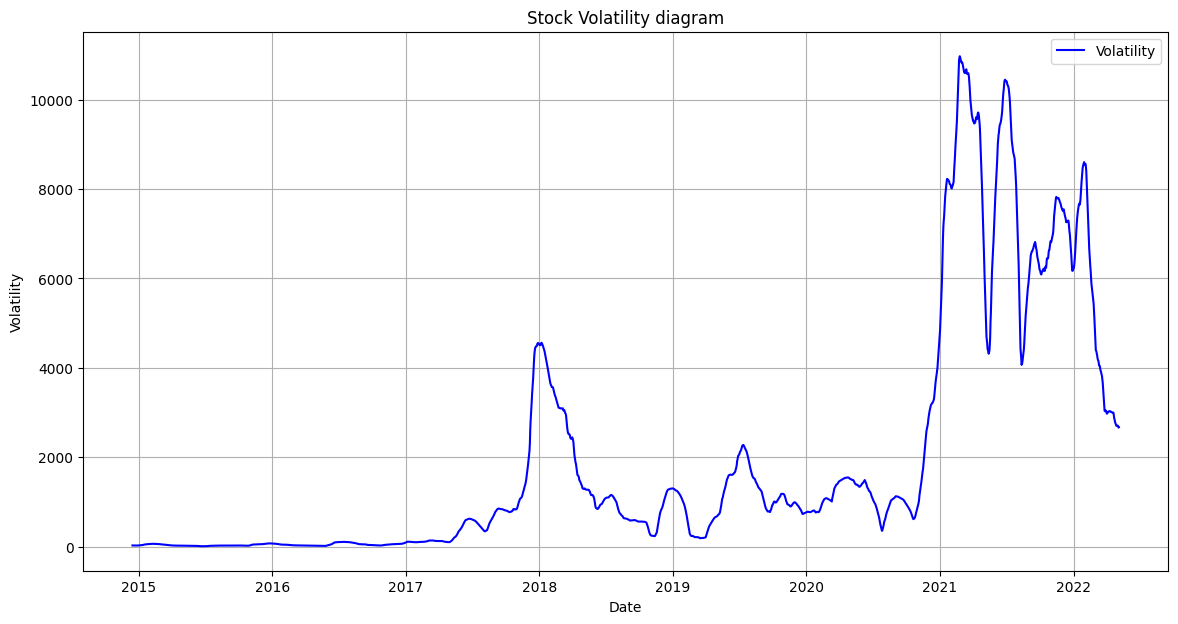

Volatility insights:
count     2699.000000
mean      1928.344320
std       2737.702427
min          9.052524
25%         72.179615
50%        823.581929
75%       2098.674433
max      10971.382835
Name: Volatility, dtype: float64


In [21]:
df['Volatility'] = df['Close'].rolling(window=90).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='blue')
plt.title('Stock Volatility diagram')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)


plt.show()

print("Volatility insights:")
print(df['Volatility'].describe())


Conclusion of above diagram:
* The high mean (1928.34) and standard deviation (2737.70) indicate that the stock's price fluctuates significantly on average. This suggests a usually high risk profile for the stock.
* The wide difference between the minimum (9.05) and maximum (10,971.38) values indicates that the stock has periods of extremely low and high volatility.

Final conclusion after volatility analysis:

* The stock has a usually high level of volatility, with notable fluctuations over the examined time, according to the volatility analysis. The high degree of volatility in this market indicates a high-risk, high-reward profile that appeals to traders seeking to profit from price fluctuations but may not be as ideal for investors who are risk averse.

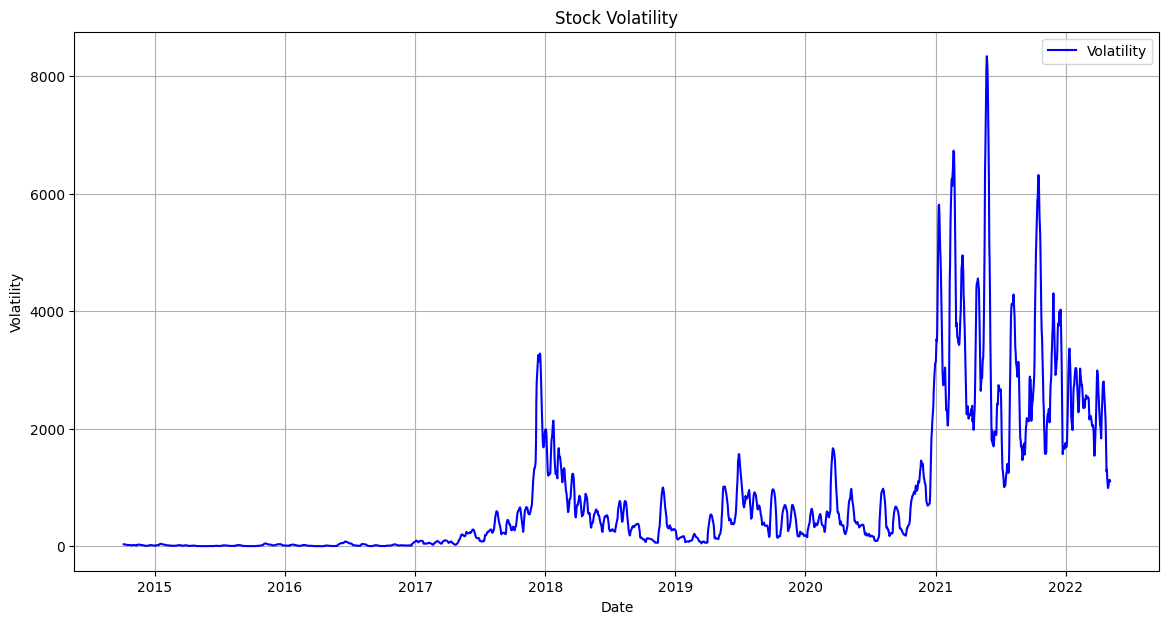

Volatility insights:
count    2769.000000
mean      819.600891
std      1255.339891
min         2.669808
25%        29.766224
50%       285.807824
75%       945.061574
max      8336.894118
Name: Volatility, dtype: float64


In [22]:
df['Volatility'] = df['Close'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='blue')
plt.title('Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)


plt.show()

print("Volatility insights:")
print(df['Volatility'].describe())


Conclsuion of above diagram:

*This implies that the stock generally experiences noticeable price fluctuations, but these fluctuations can range from very low to extremely high.
* Becouse of large standard deviation (1255.34) indicates that the stock experiences periods of high and low volatility.
* mean (819.60), minimum (2.67) and maximum (8336.89) values show a large range of volatility, indicating that the stock can be relatively stable at times and extremely volatile at others.

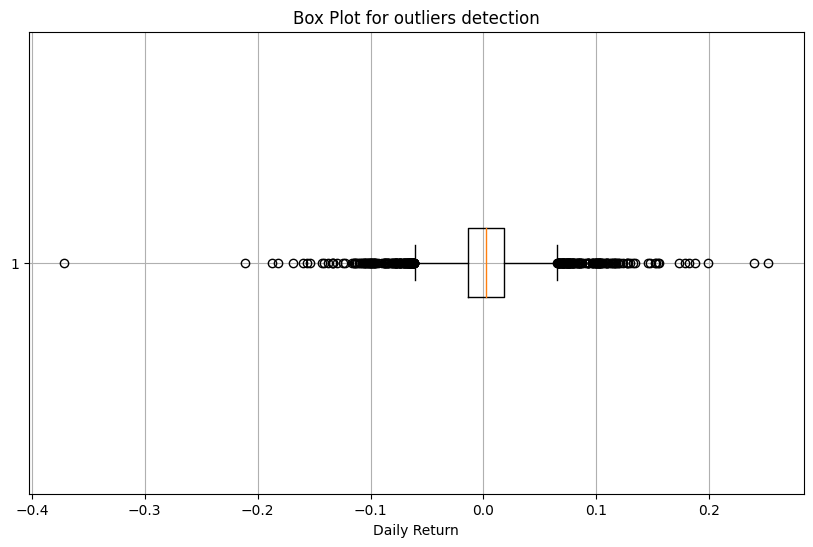

In [25]:
# box plot for identifie outliers.
plt.figure(figsize=(10, 6))
plt.boxplot(df['Daily Return'].dropna(), vert=False)
plt.title('Box Plot for outliers detection')
plt.xlabel('Daily Return')
plt.grid(True)
plt.show()


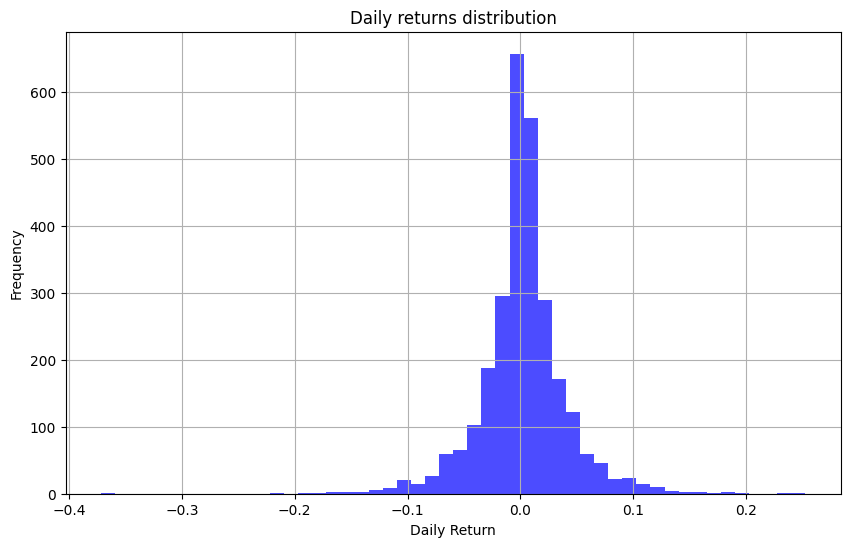

In [23]:
'''The width of the histogram indicates the variability of daily returns.
with repect to the skeweness of histogram which looks like a bell curve, it indicates a normal distribution
also the outliers at the end indicates the extreme price chnages with more risk.'''
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Return'].dropna(), bins=50, color='blue', alpha=0.7)
#bins: no of intervel in which data can be divided. alpha: transparency level of the bars
plt.title('Daily returns distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

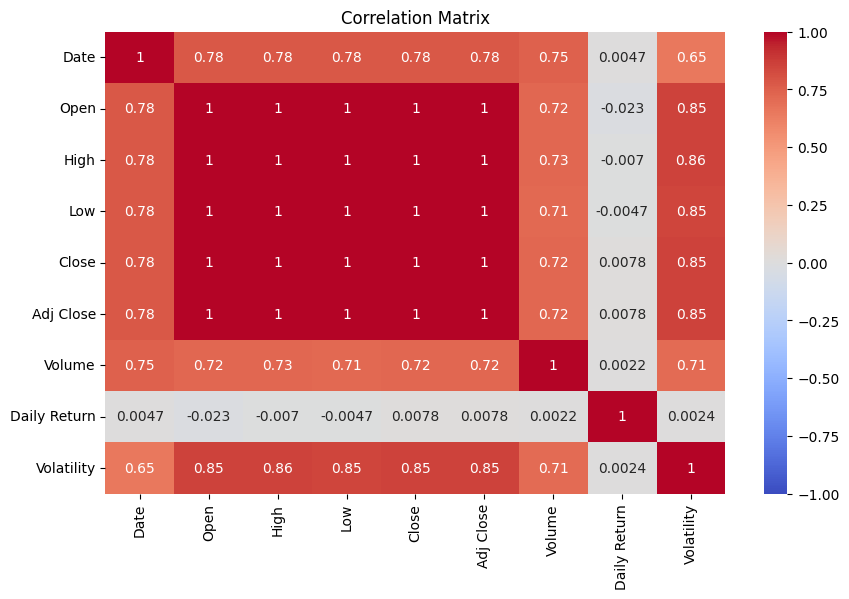

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#corr(): Computes the correlation matrix of the DataFrame
#annot=True: Annotates each cell with the correlation coefficient value.
#cmap='coolwarm':colormap to represent the data.
#vmin=-1, vmax=1: Sets the range of values for the colormap from -1 to 1
plt.title('Correlation Matrix')
plt.show()


Above diagram shows the Close, Open, High, and Low prices show very high positive correlations (close to 1).
* The correlation between Volume and price metrics is generally lower than the correlations among the price metrics themselves. This indicates that while there is some relationship between trading volume and prices, it is not as strong.
* The Daily Return shows positive correlation with price metrics suggests that higher returns are associated with higher prices, while a lower correlation with volume suggests volume does not always predict returns.